In [ ]:
from google.colab import files

In [ ]:
files.upload()

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d arpitjain007/dog-vs-cat-fastai

In [ ]:
%%capture
!mkdir /content/dog-vs-cat-fastai
!unzip /content/dog-vs-cat-fastai.zip -d /content/dog-vs-cat-fastai

In [ ]:
import os
import shutil
import random
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization,Dense, Flatten, Dropout
from tensorflow.keras.models import Model, Sequential
import numpy as np
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define the initial path
initial_path = '/content/dog-vs-cat-fastai/dogscats'


In [ ]:
# Define the directories for the train, validation, and test sets
train_dir = initial_path + '/train'
val_dir = initial_path + '/valid'

# Define the image dimensions and batch size
img_height = 224
img_width = 224
batch_size = 32
# Define the data generators for the train, validation, and test sets
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    color_mode='rgb')

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(img_height, img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                color_mode='rgb')


In [ ]:
images, labels = next(train_generator)

In [ ]:
plt.imshow(images[0])

In [ ]:
from tensorflow.keras.applications import VGG16
from keras.layers import Flatten, Dense
from keras.models import Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt

model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers
for layer in model.layers:
    layer.trainable = False

x = model.output
x = Flatten()(x)
x1 = Dense(1024, activation="relu")(x)
prediction = Dense(2, activation="softmax")(x1)

# Create a new model with modified architecture
model = Model(inputs=model.input, outputs=prediction)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


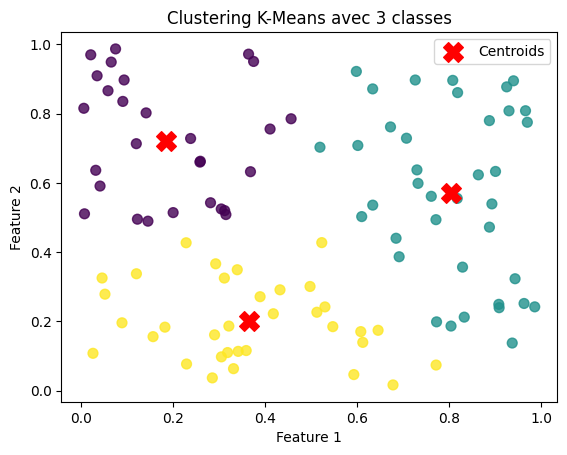

In [ ]:
# Importation des bibliothèques nécessaires
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Génération de données aléatoires pour l'exemple
np.random.seed(42)
data = np.random.rand(100, 2)

# Définition du nombre de clusters (k=3 dans cet exemple)
num_clusters = 3

# Création du modèle K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Ajustement du modèle aux données
kmeans.fit(data)

# Obtention des étiquettes de cluster pour chaque point de données
labels = kmeans.labels_

# Obtention des coordonnées des centres de cluster
centers = kmeans.cluster_centers_

# Affichage des résultats
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


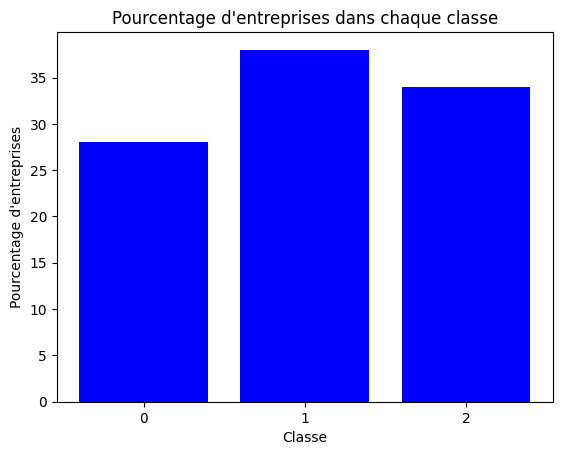

In [ ]:
percentage_per_class = [np.sum(labels == i) / len(labels) * 100 for i in range(num_clusters)]

# Affichage de l'histogramme
plt.bar(range(num_clusters), percentage_per_class, color='blue')
plt.xlabel('Classe')
plt.ylabel('Pourcentage d\'entreprises')
plt.title('Pourcentage d\'entreprises dans chaque classe')
plt.xticks(range(num_clusters), ['0', '1', '2'])
plt.show()

In [ ]:
history = model.fit(train_generator, epochs=5, validation_data=val_generator, verbose=1)

In [ ]:
model.evaluate(train_generator, verbose=1)